### Libraries used

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad

### Functions and constants

In [226]:
global alpha, T, m, H, Q, Z
H = 100
alpha = 0
T = 0.1
m = 0.5
Z = 1 #(?)

In [189]:
def utility_function_per_block(pho):
    if(pho <= 0.5):
        res = 2*pho
    else:
        res = 2*(m-1)*pho + (2 - m)
    return res

In [190]:
def entropy_per_block(pho):
    res = -pho*np.log(pho) - (1-pho)*np.log((1-pho))
    return res

In [191]:
def link_function_per_block(pho):
    a = 0
    b = pho
    I = quad(utility_function_per_block, a, b)
    return I[0]

In [192]:
def thermodynamic_potential_F_per_block(pho):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

In [193]:
def utility_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += pho * utility_function_per_block(pho)
    summation *= H
    return summation

In [194]:
def link_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += link_function_per_block(pho)
    summation *= H
    return summation

In [195]:
def thermodynamic_potential_F(pho_array):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block(pho)
    summation *= H
    return summation

In [196]:
# not useful because the results are too large
def probability_function(pho_array):
    res = 1/Z * np.exp(1/T * thermodynamic_potential_F(pho_array))
    return res

In [ ]:
"""def partition_function(pho_array):
    summation = 0
    for pho in pho_array:
        summation += np.exp( 1/T * thermodynamic_potential_F(pho))

### Analysis

#### Utility per block

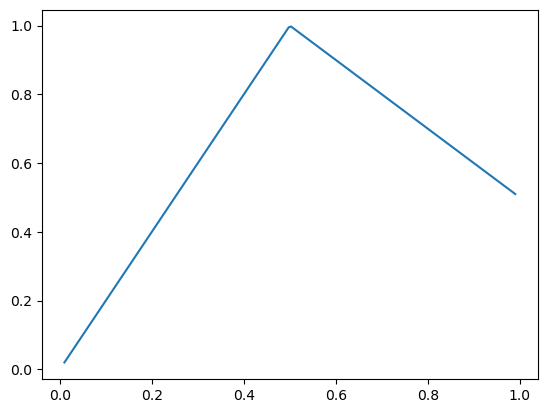

In [67]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
utility = np.zeros(steps)
for i in range(steps):
    utility[i] = utility_function_per_block(phos[i])

plt.figure()
plt.plot(phos,utility)
plt.show()

#### Entropy per block

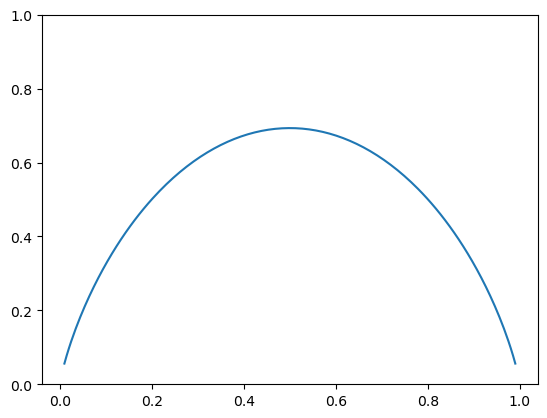

In [44]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
phos = np.linspace(pho_min,pho_max,200,endpoint=True)
entropys = entropy_per_block(phos)

plt.figure()
plt.plot(phos,entropys)
plt.ylim(0,1)
plt.show()

#### Link function per block

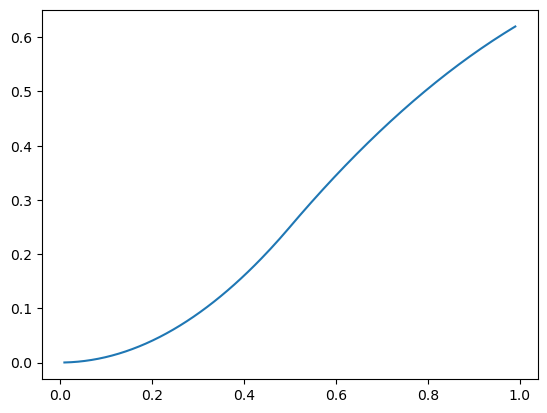

In [58]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
links = np.zeros(steps)
for i in range(steps):
    links[i] = link_function_per_block(phos[i])

plt.figure()
plt.plot(phos,links)
plt.show()

#### System with two blocks

In [198]:
global Q, pho_T
Q = 2
pho_T = 0.5

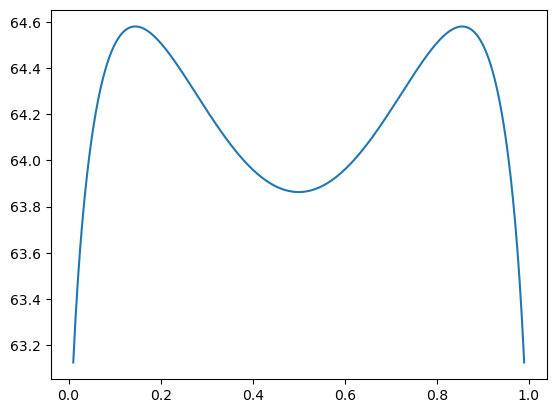

<Figure size 640x480 with 0 Axes>

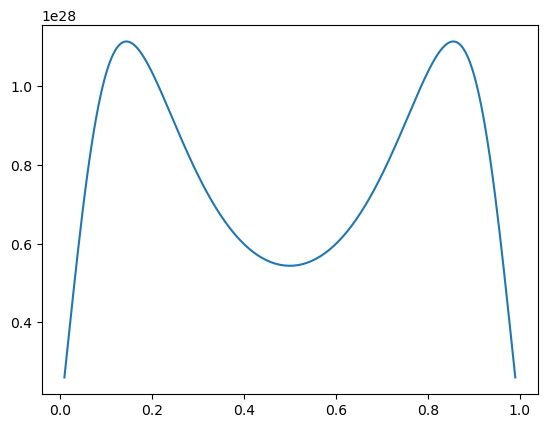

<Figure size 640x480 with 0 Axes>

In [270]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
pho_array = np.zeros([steps,2])
for i in range(steps):
    pho = phos[i]
    pho_2 = 2 * (pho_T - pho/2)
    pho_array[i] = [pho,pho_2]
    
potential_Fs = np.zeros(steps)

for i in range(steps):
    potential_Fs[i] = thermodynamic_potential_F(pho_array[i])

plt.figure()
plt.plot(phos,potential_Fs)
plt.show()

plt.figure()
plt.plot(phos, np.exp(potential_Fs))
plt.figure()

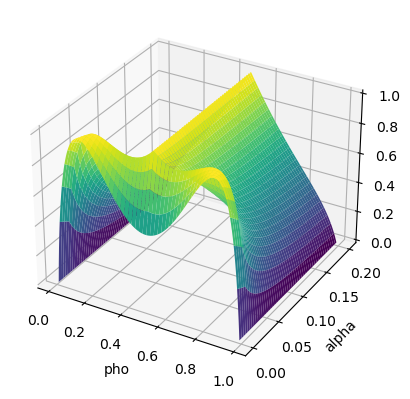

In [274]:
from mpl_toolkits.mplot3d import Axes3D

def thermodynamic_potential_F_per_block_THISCELL(pho, alpha):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

def thermodynamic_potential_F_THISCELL(pho_array, alpha):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block_THISCELL(pho, alpha)
    summation *= H
    return summation

# Data
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
alpha_min = 0
alpha_max = 0.2

steps = 200

phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
alphas = np.linspace(alpha_min,alpha_max,steps,endpoint=True)

pho_array = np.zeros([steps,2])
for i in range(steps):
    pho = phos[i]
    pho_2 = 2 * (pho_T - pho/2)
    pho_array[i] = [pho,pho_2]

# Z values
Z = np.zeros([steps,steps])

for i in range(steps):
    for j in range(steps):
        Z[i,j] = thermodynamic_potential_F_THISCELL(pho_array[j], alphas[i])

for i in range(steps):
    Z_max = max(Z[i])
    Z_min = min(Z[i])
    for j in range(steps):
        Z[i,j] = (Z[i,j] - Z_min) / (Z_max - Z_min)
        
# create grid
phos, alphas = np.meshgrid(phos, alphas)

# create 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create graph
surface = ax.plot_surface(phos, alphas, Z, cmap='viridis')

# labels
ax.set_xlabel('pho')
ax.set_ylabel('alpha')
ax.set_zlabel('Z')

plt.show()